In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
os.getcwd()

'/content'

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/kaggle/kaggle.json

chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [0]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56           8314  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59           9312  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25           5945  
jessicali9530/stanford-dogs-dataset                          Stanford Dogs Dataset                               735MB  2019-02-13 05:45:25            462  
bigquery/crypto-ethereum-classic                          

In [0]:
!kaggle datasets download iarunava/cell-images-for-detecting-malaria

 95% 319M/337M [00:04<00:00, 103MB/s]
100% 337M/337M [00:05<00:00, 70.1MB/s]


In [0]:
!mkdir data

In [0]:
!unzip cell-images-for-detecting-malaria.zip -d data

Archive:  cell-images-for-detecting-malaria.zip
   creating: data/cell_images/
   creating: data/cell_images/Parasitized/
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_

In [0]:
os.listdir(path)

NameError: ignored

In [0]:
path = './data/cell_images/'

In [0]:
data = ImageDataBunch.from_folder(path=path,valid_pct=0.2,ds_tfms=get_transforms(flip_vert=True,max_warp=0),size=224,bs=64)

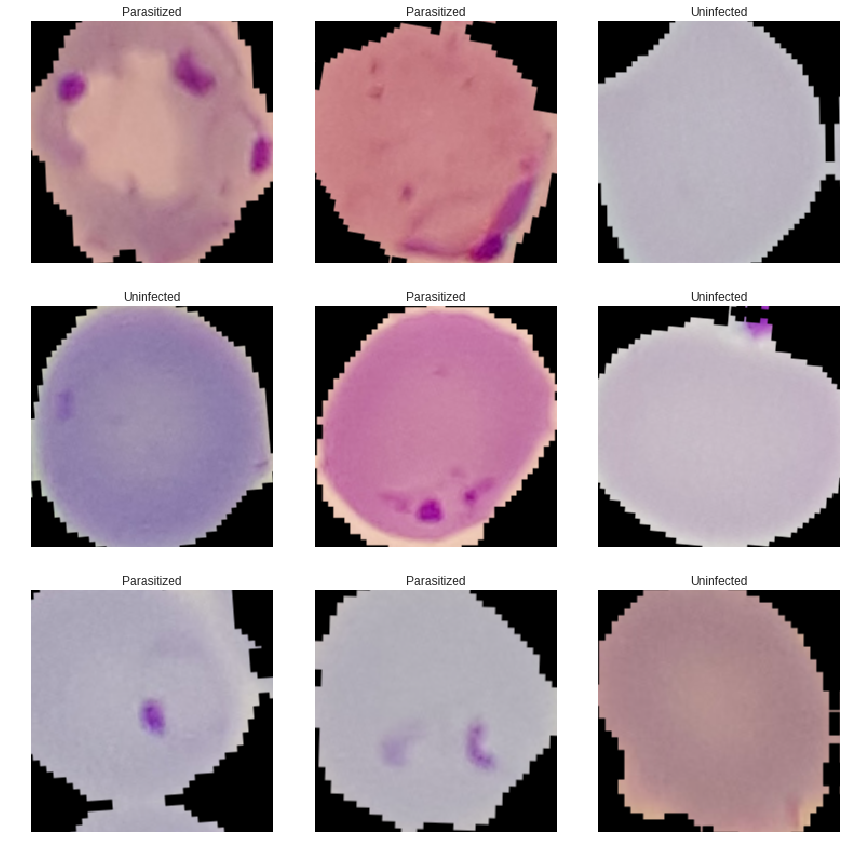

In [0]:
data.show_batch(rows=3)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (22047 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: data/cell_images;

Valid: LabelList (5511 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Uninfected,Parasitized,Parasitized,Parasitized,Uninfected
Path: data/cell_images;

Test: None

In [0]:
learn = create_cnn(data,models.resnet50,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:00, 105731306.96it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


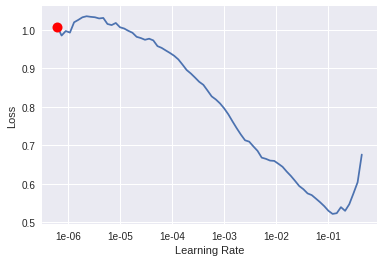

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy
1,0.196747,0.156892,0.945563
2,0.155867,0.115466,0.958810
3,0.135960,0.107349,0.960624
4,0.126863,0.103288,0.962983


In [0]:
learn.save('malerai-v1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06


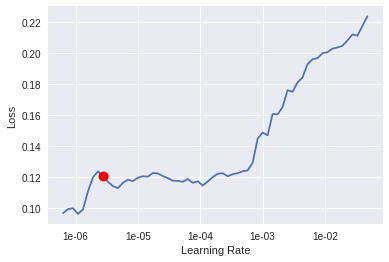

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5,max_lr=slice(1e-06,1e-05))

epoch,train_loss,valid_loss,accuracy
1,0.121537,0.102218,0.963165
2,0.116881,0.099986,0.964979
3,0.120819,0.097446,0.965342
4,0.118456,0.096398,0.965886
5,0.099498,0.096438,0.965161


In [0]:
learn.save('maleria-v2')

In [0]:
infer = ClassificationInterpretation.from_learner(learn)

In [0]:
infer.confusion_matrix()

array([[2667,  116],
       [  76, 2652]])

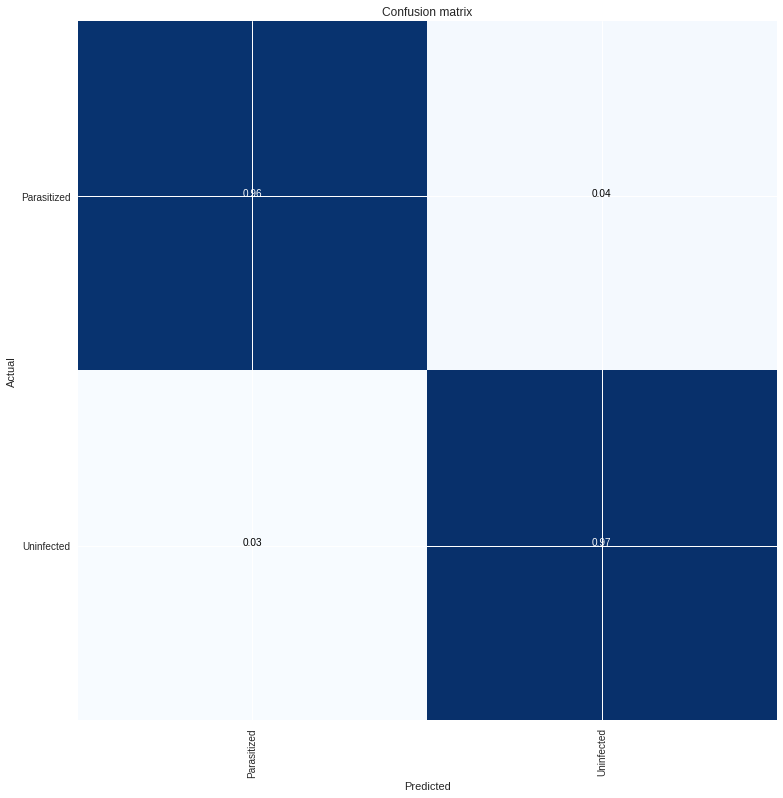

In [0]:
infer.plot_confusion_matrix(9,figsize=(15,11))

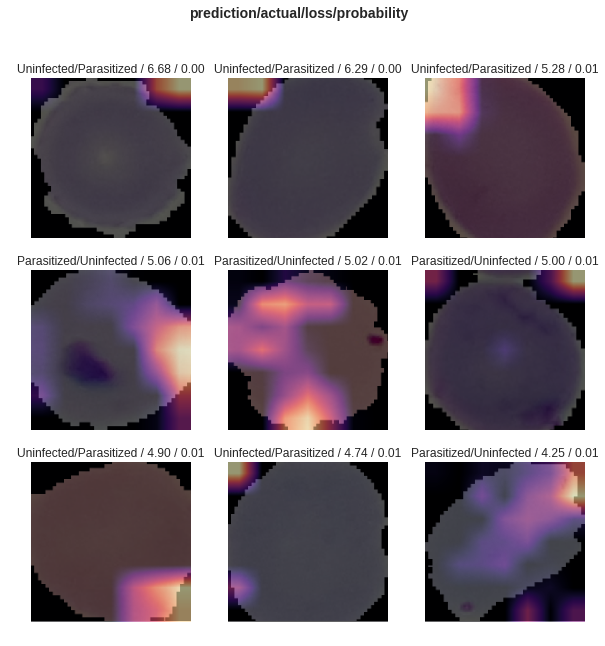

In [0]:
infer.plot_top_losses(9,figsize=(10,10))

In [0]:
classes = ['Parasitized','Uninfected']

In [0]:
data2 = ImageDataBunch.single_from_classes(path,classes,ds_tfms = get_transforms(),size=224).normalize(imagenet_stats)

In [0]:
learn = create_cnn(data2,models.resnet50)

In [0]:
learn.load('maleria-v2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageItemList

y: CategoryList

Path: data/cell_images;

Valid: LabelList (0 items)
x: ImageItemList

y: CategoryList

Path: data/cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stri

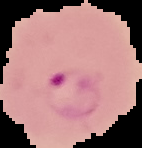

In [0]:
imgp = open_image(path+'Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png');imgp

In [0]:
pred_class,pred_id,op = learn.predict(imgp)

In [0]:
pred_class

Category Parasitized